## 🏆 KPI: Total High-Risk Events (Magnitude >= 6.0): 749


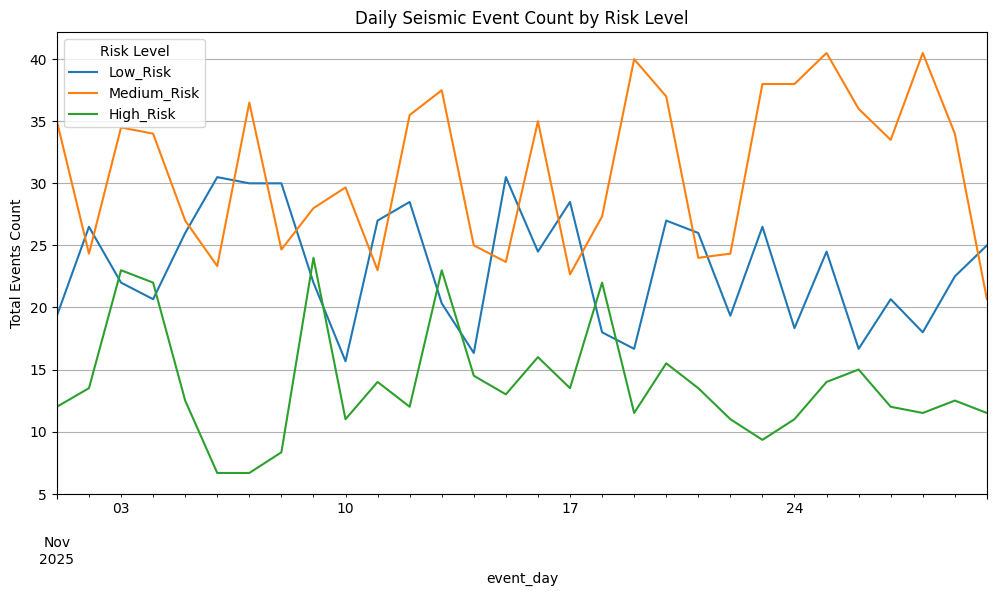

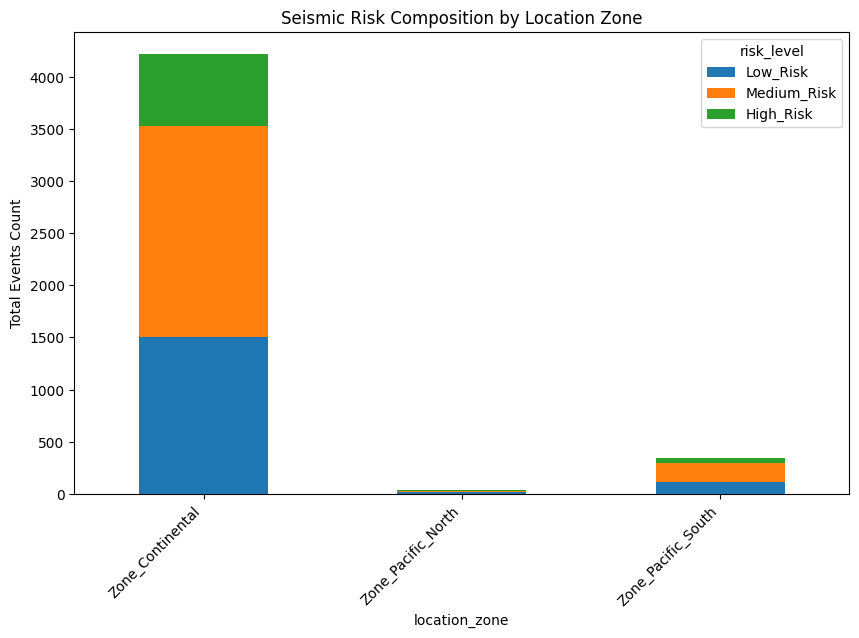


## 🧠 Insights:
La **Zone_Continental** tiene la magnitud promedio más alta, demostrando que el análisis ELT puede identificar zonas prioritarias para la mitigación de desastres.


In [ ]:
# Earthquakes Risk Analysis Dashboard ---
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import os

# CONFIGURACIÓN SEGURA -----------------------------------------
# Usamos un camino fijo basado en la ubicación de la notebook:
# La notebook está en 'dashboard/', la base de datos está en '../data/'
DB_PATH = os.path.join(os.path.dirname(os.getcwd()), 'data', 'seismic_events.duckdb')
ANALYTICS_TABLE = 'analytics_seismic_risk'

if not os.path.exists(DB_PATH):
    print("ERROR: La base de datos no existe. Ejecuta primero python scripts/transform_data.py")
else:
    con = duckdb.connect(database=DB_PATH, read_only=True)
    df_analytics = con.execute(f"SELECT * FROM {ANALYTICS_TABLE}").fetchdf()
    con.close()

    df_analytics['event_day'] = pd.to_datetime(df_analytics['event_day'])

    # --- 1. KPI: Número total de eventos de Alto Riesgo ---
    total_high_risk = df_analytics[df_analytics['risk_level'] == 'High_Risk']['total_events'].sum()
    print(f"## 🏆 KPI: Total High-Risk Events (Magnitude >= 6.0): {total_high_risk}")

    # --- 2. Gráfico 1: Tendencia Diaria de Eventos por Nivel de Riesgo ---
    plt.figure(figsize=(12, 6))
    risk_pivot = df_analytics.pivot_table(index='event_day', columns='risk_level', values='total_events', fill_value=0)
    
    # Asegura el orden y maneja las columnas faltantes
    risk_order = ['Low_Risk', 'Medium_Risk', 'High_Risk']
    risk_pivot = risk_pivot.reindex(columns=[c for c in risk_order if c in risk_pivot.columns], fill_value=0)

    risk_pivot.plot(kind='line', ax=plt.gca())
    plt.title('Daily Seismic Event Count by Risk Level')
    plt.ylabel('Total Events Count')
    plt.legend(title='Risk Level')
    plt.grid(True)
    plt.show()
    # 
    # --- 3. Gráfico 2: Composición del Riesgo por Zona ---
    plt.figure(figsize=(10, 6))
    zone_risk_counts = df_analytics.groupby(['location_zone', 'risk_level'])['total_events'].sum().unstack(fill_value=0)
    
    # Asegura el orden y maneja las columnas faltantes
    zone_risk_counts = zone_risk_counts.reindex(columns=risk_order, fill_value=0)
    
    zone_risk_counts.plot(kind='bar', stacked=True, ax=plt.gca(), title='Seismic Risk Composition by Location Zone')
    plt.ylabel('Total Events Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    # 
    # --- 4. Insights (Para el README) ---
    most_risky_zone = df_analytics.groupby('location_zone')['avg_magnitude'].mean().idxmax()
    print(f"\n## 🧠 Insights:")
    print(f"La **{most_risky_zone}** tiene la magnitud promedio más alta, demostrando que el análisis ELT puede identificar zonas prioritarias para la mitigación de desastres.")